# Water Quality Prediction

#### Dataset Description

#### Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

#### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

##### 1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

##### 2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

##### 3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

##### 4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

##### 5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

##### 6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

##### 7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

##### 8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

##### 9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

##### 10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
(0) Water is not safe to drink and (1) Water is safe to drink

# Data Gathering

In [1]:
import pandas as pd # Data Processing
import numpy as np # Linear Algebra
import seaborn as sns # Stastistical Visualization
import matplotlib.pyplot as plt # Visualization for Numpy and Pandas
import warnings
warnings.filterwarnings("ignore") # Ignore the warnings

In [2]:
data = pd.read_csv(r"D:\DS projects\water quality analysis\water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.shape # No of Rows and No of Columns

(3276, 10)

In [4]:
data.isnull().sum() # Missing Counts

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data.describe() # Stats for each column

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000



####  Missing values handling in this Dataset can be done in 2 ways 

 1. entire data can be replace with Mean Strategy
 2. Missing value column as per column strategy
 
 It should be done based on statistics values

In [4]:
data.fillna(data.mean(), inplace =True)

#data["ph"]=data["ph"].fillna(data["ph"].mean())
#data["Sulfate"]=data["Sulfate"].fillna(data["Sulfate"].median())
#data["Trihalomethanes"]=data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean())

In [5]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Data Distribution 
#### with the visulization we can predict data is Biased distribution

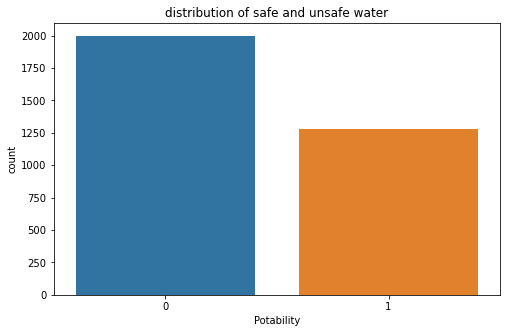

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data.Potability)
plt.title("distribution of safe and unsafe water")
plt.show()

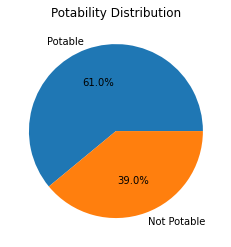

In [8]:
potability_counts = data['Potability'].value_counts()
labels = ['Potable', 'Not Potable']

plt.pie(potability_counts, labels=labels, autopct='%1.1f%%')
plt.title('Potability Distribution')
plt.show()

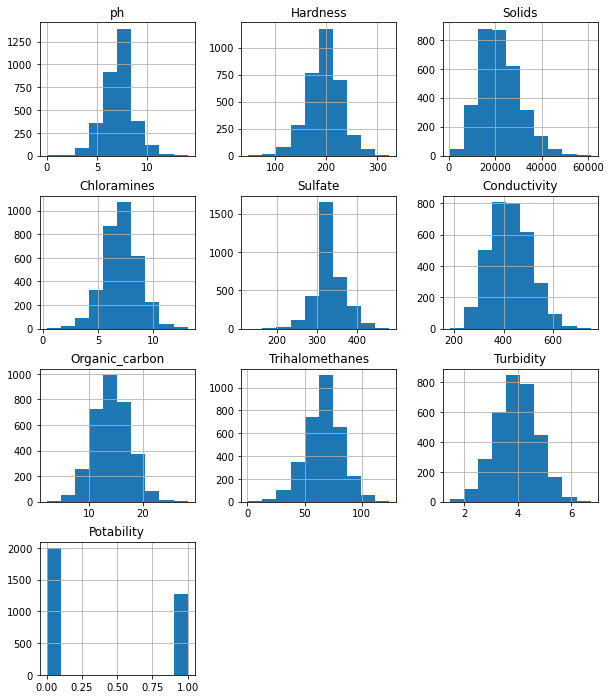

In [18]:
# futher level of checking the distribution, in column wise
data.hist(figsize=(10,12))
plt.show()

In [11]:
# lets check the Histogram using plotly for individual variables
import plotly.express as px

In [21]:
px.histogram(data, x="ph", color= "Potability", title= "Factors Affecting Water Quality: PH")

In [11]:
px.histogram(data, x="Hardness", color= "Potability", title= "Factors Affecting Water Quality: Hardness")

In [12]:
px.histogram(data, x="Solids", color= "Potability", title= "Factors Affecting Water Quality: Solids")

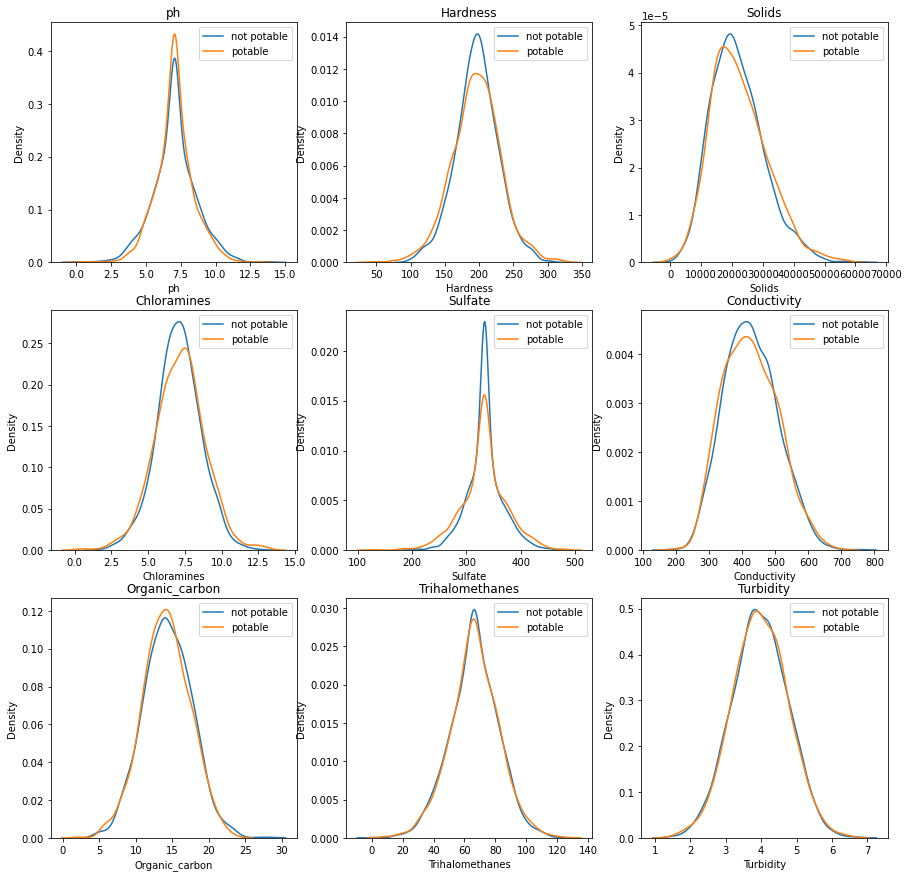

In [14]:
# lets visualize with KDE plot for futher Analysis
not_potable= data.query("Potability==0")
potable= data.query("Potability==1")

plt.figure(figsize=(15,15))
for i, col in enumerate(data.columns[:9]):
    plt.subplot(3,3,i+1)
    plt.title(col)
    sns.kdeplot(x= not_potable[col], label= "not potable")
    sns.kdeplot(x=potable[col], label = "potable")
    plt.legend()
    

In [15]:
corr= round(data.corr(),2)
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.00,0.08,-0.08,-0.03,0.01,0.02,0.04,0.00,-0.04,-0.00
Hardness,0.08,1.00,-0.05,-0.03,-0.09,-0.02,0.00,-0.01,-0.01,-0.01
Solids,-0.08,-0.05,1.00,-0.07,-0.15,0.01,0.01,-0.01,0.02,0.03
Chloramines,-0.03,-0.03,-0.07,1.00,0.02,-0.02,-0.01,0.02,0.00,0.02
Sulfate,0.01,-0.09,-0.15,0.02,1.00,-0.01,0.03,-0.03,-0.01,-0.02
Conductivity,0.02,-0.02,0.01,-0.02,-0.01,1.00,0.02,0.00,0.01,-0.01
Organic_carbon,0.04,0.00,0.01,-0.01,0.03,0.02,1.00,-0.01,-0.03,-0.03
Trihalomethanes,0.00,-0.01,-0.01,0.02,-0.03,0.00,-0.01,1.00,-0.02,0.01
Turbidity,-0.04,-0.01,0.02,0.00,-0.01,0.01,-0.03,-0.02,1.00,0.00
Potability,-0.00,-0.01,0.03,0.02,-0.02,-0.01,-0.03,0.01,0.00,1.00


<AxesSubplot:>

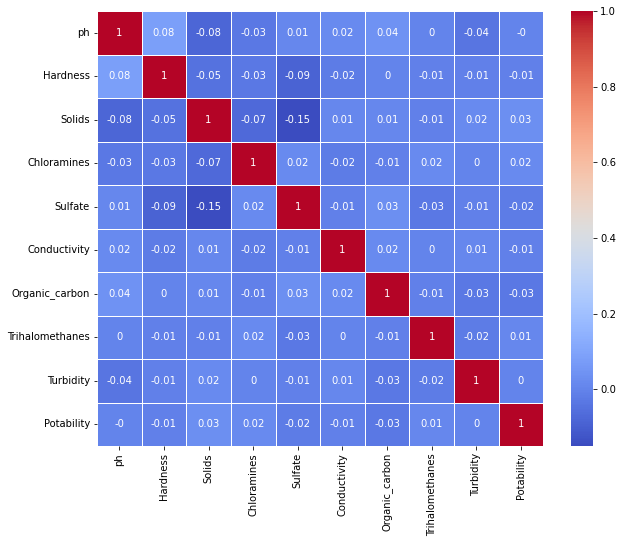

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, cmap="coolwarm", annot=True, linewidths=0.8)

# pip install pycaret

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient.

In [18]:
from pycaret.classification import *
clf= setup(data, target= "Potability", session_id= 786)
compare_models()

,Description,Value
0,Session id,786
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(3276, 10)"
4,Transformed data shape,"(3276, 10)"
5,Transformed train set shape,"(2293, 10)"
6,Transformed test set shape,"(983, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6699,0.6697,0.3073,0.6742,0.4195,0.2317,0.2679,0.1750
qda,Quadratic Discriminant Analysis,0.6690,0.6831,0.3274,0.6553,0.4347,0.2362,0.2655,0.1330
rf,Random Forest Classifier,0.6629,0.6736,0.3285,0.6359,0.4319,0.2250,0.2508,0.1600
lightgbm,Light Gradient Boosting Machine,0.6576,0.6663,0.4112,0.5905,0.4832,0.2396,0.2492,0.2460
gbc,Gradient Boosting Classifier,0.6324,0.6284,0.2302,0.5746,0.3274,0.1345,0.1616,0.1410
nb,Naive Bayes,0.6158,0.5815,0.2034,0.5256,0.2928,0.0937,0.1147,0.1260
lda,Linear Discriminant Analysis,0.6136,0.5105,0.0111,0.5000,0.0217,0.0126,0.0516,0.1300
ridge,Ridge Classifier,0.6119,0.0000,0.0067,0.3000,0.0130,0.0072,0.0291,0.1340
lr,Logistic Regression,0.6110,0.5062,0.0034,0.2000,0.0066,0.0041,0.0201,0.9170
dummy,Dummy Classifier,0.6097,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1340


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=786, verbose=0, warm_start=False)

In [19]:
# Lets create model with Extra Trees Classifier, as it gave top results in many aspects
model= create_model("et")
predict= predict_model(model, data=data)
predict

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6522,0.6645,0.2333,0.6562,0.3443,0.1749,0.2182
1,0.6870,0.7022,0.2556,0.8214,0.3898,0.2507,0.3281
2,0.7000,0.6792,0.3889,0.7143,0.5036,0.3145,0.3443
3,0.6725,0.7073,0.3444,0.6596,0.4526,0.2504,0.2773
4,0.6245,0.6433,0.2667,0.5455,0.3582,0.1349,0.1522
5,0.7293,0.7135,0.3708,0.8462,0.5156,0.3653,0.4252
6,0.6463,0.6540,0.3034,0.5870,0.4000,0.1838,0.2040
7,0.6550,0.6374,0.2697,0.6316,0.3780,0.1894,0.2223
8,0.6594,0.6316,0.2921,0.6341,0.4000,0.2051,0.2352


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9005,0.9703,0.7950,0.9407,0.8617,0.7849,0.7917


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
0,7.080794,204.890457,20791.318359,7.300212,368.516449,564.308655,10.379783,86.990967,2.963135,0,0,1.00
1,3.716080,129.422928,18630.058594,6.635246,333.775787,592.885376,15.180013,56.329075,4.500656,0,0,1.00
2,8.099124,224.236252,19909.541016,9.275884,333.775787,418.606201,16.868637,66.420090,3.055934,0,0,1.00
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.54
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681732,47580.992188,7.166639,359.948578,526.424194,13.894419,66.687698,4.435821,1,1,1.00
3272,7.808856,193.553207,17329.802734,8.061362,333.775787,392.449585,19.903225,66.396294,2.798243,1,0,0.59
3273,9.419510,175.762650,33155.578125,7.350233,333.775787,432.044769,11.039070,69.845398,3.298876,1,0,0.56
3274,5.126763,230.603760,11983.869141,6.303357,333.775787,402.883118,11.168946,77.488213,4.708659,1,1,1.00


In [20]:
# Lets try with Random Forest Classifier and model Accuracy
model_rf= create_model("rf")
predict_rf= predict_model(model_rf, data=data)
predict_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6348,0.6548,0.2778,0.5682,0.3731,0.1563,0.1763
1,0.6783,0.6978,0.2778,0.7353,0.4032,0.2402,0.2936
2,0.7174,0.6957,0.4000,0.7660,0.5255,0.3514,0.3890
3,0.6725,0.7435,0.3556,0.6531,0.4604,0.2536,0.2778
4,0.6114,0.6345,0.3000,0.5094,0.3776,0.1218,0.1308
5,0.7074,0.6744,0.3708,0.7500,0.4962,0.3219,0.3615
6,0.6594,0.6675,0.3371,0.6122,0.4348,0.2193,0.2393
7,0.6419,0.6531,0.2921,0.5778,0.3881,0.1719,0.1919
8,0.6638,0.6425,0.3596,0.6154,0.4539,0.2344,0.2521


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9002,0.9670,0.8059,0.9288,0.8630,0.7851,0.7900


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
0,7.080794,204.890457,20791.318359,7.300212,368.516449,564.308655,10.379783,86.990967,2.963135,0,0,0.88
1,3.716080,129.422928,18630.058594,6.635246,333.775787,592.885376,15.180013,56.329075,4.500656,0,0,0.80
2,8.099124,224.236252,19909.541016,9.275884,333.775787,418.606201,16.868637,66.420090,3.055934,0,0,0.90
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.56
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681732,47580.992188,7.166639,359.948578,526.424194,13.894419,66.687698,4.435821,1,1,0.77
3272,7.808856,193.553207,17329.802734,8.061362,333.775787,392.449585,19.903225,66.396294,2.798243,1,0,0.61
3273,9.419510,175.762650,33155.578125,7.350233,333.775787,432.044769,11.039070,69.845398,3.298876,1,0,0.58
3274,5.126763,230.603760,11983.869141,6.303357,333.775787,402.883118,11.168946,77.488213,4.708659,1,1,0.79
